In [1]:
import math
import pandas as pd
import random
import numpy as np
import random
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple

In [2]:
data = pd.read_csv('./data/FinalData.csv')
data.head(5)

,ID,Name,Address,Latitude,Longitude,Opening Hours,Types,Rating,User Ratings Total
0,ChIJ-3wY7lEYQjERrJ9wTeoa-WQ,Blue Summer Hotel,"35 Tôn Thất Đạm, Xuân Hà, Thanh Khê, Đà Nẵng 5...",16.072062,108.201392,"['Monday: Open 24 hours', 'Tuesday: Open 24 ho...","['lodging', 'point_of_interest', 'establishment']",3.9,42.0
1,ChIJ-UBpozMYQjERDV3V1nrXEiM,Vinapha 2 Hotel,"19 Phạm Hồng Thái, Hải Châu 1, Hải Châu, Đà Nẵ...",16.067351,108.221777,['Monday: 12:00\u202fAM\u2009–\u200911:59\u202...,"['lodging', 'point_of_interest', 'establishment']",3.0,93.0
2,ChIJ13MshlIYQjERM4sqFu8lvyA,Ribo Coffee,"05 Thái Thị Bôi, Chính Gián, Thanh Khê, Đà Nẵn...",16.068272,108.201195,['Monday: 6:30\u202fAM\u2009–\u200910:30\u202f...,"['cafe', 'food', 'point_of_interest', 'establi...",4.1,306.0
3,ChIJ14kOf8kZQjERrdrrQPpiZKA,Mì Quảng Thi,"251 Hoàng Diệu, Nam Dương, Hải Châu, Đà Nẵng 5...",16.058546,108.217224,['Monday: 6:00\u202fAM\u2009–\u20091:29\u202fP...,"['restaurant', 'point_of_interest', 'food', 'e...",4.3,308.0
4,ChIJ2aT3UqMXQjER_rVaqCoyyWU,Chùa Linh Ứng,"Vườn Lâm Tỳ Ni, Hoàng Sa, Thọ Quang, Sơn Trà, ...",16.100261,108.277747,"['Monday: Open 24 hours', 'Tuesday: Open 24 ho...","['place_of_worship', 'point_of_interest', 'est...",4.7,1785.0


In [3]:
dataHours = pd.read_csv('./data/opening_hours.csv')
dataHours.head(5)

,ID,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,ChIJ-3wY7lEYQjERrJ9wTeoa-WQ,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM
1,ChIJ-UBpozMYQjERDV3V1nrXEiM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM
2,ChIJ13MshlIYQjERM4sqFu8lvyA,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM
3,ChIJ14kOf8kZQjERrdrrQPpiZKA,"6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM"
4,ChIJ2aT3UqMXQjER_rVaqCoyyWU,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM


In [4]:
newData = data.loc[:, ["ID", "Name", "Latitude", "Longitude"]]
newData.head(5)

,ID,Name,Latitude,Longitude
0,ChIJ-3wY7lEYQjERrJ9wTeoa-WQ,Blue Summer Hotel,16.072062,108.201392
1,ChIJ-UBpozMYQjERDV3V1nrXEiM,Vinapha 2 Hotel,16.067351,108.221777
2,ChIJ13MshlIYQjERM4sqFu8lvyA,Ribo Coffee,16.068272,108.201195
3,ChIJ14kOf8kZQjERrdrrQPpiZKA,Mì Quảng Thi,16.058546,108.217224
4,ChIJ2aT3UqMXQjER_rVaqCoyyWU,Chùa Linh Ứng,16.100261,108.277747


In [5]:
#Cloudy Phan Dang Luu
latInit = 16.019110655988168
lngInit = 108.22903420822459

In [6]:
def haversineDistance(lat1, lng1, lat2, lng2):
    latRadian1 = math.radians(lat1)
    lngRadian1 = math.radians(lng1)
    latRadian2 = math.radians(lat2)
    lngRadian2 = math.radians(lng2)

    dlat = latRadian2 - latRadian1
    dlng = lngRadian2 - lngRadian1
    R = 6371e3

    a = math.sin(dlat/2) ** 2 + math.cos(latRadian1) * math.cos(latRadian2) * math.sin(dlng/2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    return R * c

In [7]:
def calFitness(routeDistance: float):
    return 1/(routeDistance + 1)

In [8]:
class TimeActive:
    def __init__(self, open: int, close: int) -> None:
        self.open = open
        self.close = close

In [9]:
class Location:
    def __init__(self, x: float, y: float, timeOpens: List[TimeActive] = None, name: str = None, time: TimeActive = None) -> None:
        self.name = name
        self.x = x
        self.y =y
        self.timOpens = timeOpens
        self.time = time

    def to_tupl(self) -> Tuple:
        return (self.x, self.y)
    
    def set_Time(self, time: TimeActive):
        self.time = time

In [10]:
class Route:
    def __init__(self, route: List['Location']) -> None:
        self.route = route
        self.distance: float = 0.0
        self.fitness: float = 0.0
    
    def routeDistance(self) -> float:
        if self.distance == 0: 
            pathDistance = 0.0  
            for index in range(0, len(self.route) - 1):
                dist = haversineDistance(self.route[index].x, self.route[index].y, self.route[index + 1].x, self.route[index + 1].y)
                pathDistance+= dist
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self) -> float:
        if self.fitness == 0:
            self.fitness = calFitness(self.routeDistance())
        return self.fitness
    
    def coordinates(self) -> Tuple[List[float], List[float]]:
        x_list, y_list = [], []
        for location in self.route:
            x_list.append(location.to_tupl()[0])
            y_list.append(location.to_tupl()[1])
        return x_list, y_list

In [11]:
def compareTime(currentTime, stayTime, timeOpens: List[TimeActive]):
    for i in range(len(timeOpens)):
        #lon hon thoi gian mo cua, thoi gian roi di be hon thoi gian dong cua
        if timeOpens[i].open <= currentTime and timeOpens[i].close >= currentTime + stayTime:
            return True
    return False

In [12]:
import datetime
def handle_duration_and_weekdays(start_time, end_time):
    # Chuyển đổi chuỗi thời gian thành đối tượng datetime
    start_dt = datetime.datetime.strptime(start_time, '%I:%M %p %d/%m/%Y')
    end_dt = datetime.datetime.strptime(end_time, '%I:%M %p %d/%m/%Y')

    # Tính khoảng thời gian và số ngày của nó
    duration_time = int((end_dt - start_dt).total_seconds() // 60)
    num_days = int((end_dt - start_dt).days)

    # Tạo một mảng các thứ trong khoảng thời gian
    current_dt = start_dt
    weekdays = []
    while current_dt <= end_dt:
        weekdays.append(current_dt.strftime('%A'))
        current_dt += datetime.timedelta(days=1)

    return duration_time, num_days, weekdays

print(handle_duration_and_weekdays("7:00 AM 19/4/2023", "10:00 AM 19/4/2023"))

(180, 0, ['Wednesday'])


In [13]:
def handleTimes(time, text):
    time = time.split(':')

    hour = int(time[0])
    minute = int(time[1])

    value = hour * 60 + minute if text == 'AM' else (hour+ 12) * 60 + minute
    return value

In [14]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_opening_hours = {}
for day in range(len(days)):
    timeOpens = []
    for i in range(0, len(dataHours)):
        openingHours = dataHours.iloc[i][days[day]]
        openingHours = openingHours.strip("']['").split(',')
        opens = []
        closes = []
        for item in openingHours:
            times = item.strip(' ').split(' ')
            timeOpen = handleTimes(times[0], times[1])
            timeClose = handleTimes(times[-2], times[-1])
            opens.append(timeOpen)
            closes.append(timeClose)
        timeOpens.append([TimeActive(opens[i], closes[i]) for i in range(len(opens))])
    weekdays_opening_hours[days[day]] = timeOpens
print(weekdays_opening_hours)

{'Monday': [[<__main__.TimeActive object at 0x7f4b1a839030>], [<__main__.TimeActive object at 0x7f4b1a817580>], [<__main__.TimeActive object at 0x7f4b1a838ac0>], [<__main__.TimeActive object at 0x7f4afe047fa0>, <__main__.TimeActive object at 0x7f4afe047f40>], [<__main__.TimeActive object at 0x7f4afe047f10>], [<__main__.TimeActive object at 0x7f4afe0fa350>], [<__main__.TimeActive object at 0x7f4afe0f9930>], [<__main__.TimeActive object at 0x7f4afe0f9bd0>], [<__main__.TimeActive object at 0x7f4afe0fbb50>], [<__main__.TimeActive object at 0x7f4afe0fbaf0>], [<__main__.TimeActive object at 0x7f4afe0fa530>], [<__main__.TimeActive object at 0x7f4afe0f8af0>], [<__main__.TimeActive object at 0x7f4afe0f8d90>], [<__main__.TimeActive object at 0x7f4afe0f8eb0>], [<__main__.TimeActive object at 0x7f4afe0fa9e0>], [<__main__.TimeActive object at 0x7f4afe0f9b10>], [<__main__.TimeActive object at 0x7f4afe0f8d00>], [<__main__.TimeActive object at 0x7f4afe0fb1f0>], [<__main__.TimeActive object at 0x7f4afe

In [44]:
def getPointByDay(data, startPoint, startTime, stayTime, day, allPoints):
    timeOpens = weekdays_opening_hours[day]
    currentPoint = startPoint
    timeCome = startTime
    listDetailPoints = [Location(currentPoint[0], currentPoint[1], timeOpens='Start point', name='Start point', time=TimeActive(timeCome, timeCome))]
    listPoints = [currentPoint]
    while(timeCome + stayTime < 1350):
        minDistance = float('inf')
        nextPoint = None
        point = None
        timeCome = timeCome + 30
        name = None

        for i, row in data.iterrows():
            lat = row['Latitude']
            lng = row['Longitude']
            timeOpen = timeOpens[i]
            
            if (lat, lng) not in listPoints and (lat, lng) not in allPoints:
                if compareTime(timeCome, stayTime, timeOpen) == False:
                    continue

                dist = haversineDistance(currentPoint[0], currentPoint[1], lat, lng)

                if dist < minDistance:
                    minDistance = dist
                    nextPoint = (lat, lng)
                    point = i
                    name = row['Name']
    
        if nextPoint is not None:
            currentPoint = nextPoint
            listPoints.append(currentPoint)
            listDetailPoints.append(Location(currentPoint[0], currentPoint[1], timeOpens[point], name, time=TimeActive(timeCome, timeCome + stayTime)))
            timeCome = timeCome + stayTime
    listDetailPoints.append(Location(startPoint[0], startPoint[1], timeOpens='End point', name='End point', time=TimeActive(timeCome, timeCome)))
    return listPoints, listDetailPoints

In [57]:
def nearestNeighborAlgorithm(data):
    duration_time, num_days, weekdays = handle_duration_and_weekdays("7:00 AM 19/4/2023", "7:00 AM 22/4/2023")
    startPoint = (latInit, lngInit)
    allPoints = []
    routesInfo = []

    for day in range(num_days):
        startTime = handleTimes("07:00", "AM") 
        ####### find in day
        listPoints, listDetailPoints = getPointByDay(data, startPoint, startTime, 90, weekdays[day], allPoints)
        allPoints += listPoints
        routesInfo.append(listDetailPoints)

    return routesInfo

In [17]:
def nearestNeighborAlgorithm1(data, n = 14):
    startPoint = (latInit, lngInit)
    listPoints = []
    listDetailsPoint = []

    currentPoint = startPoint
    listPoints.append(currentPoint)
    detailsPoint = [ 0, 'Cloudy', currentPoint]
    listDetailsPoint.append(detailsPoint)

    while(len(listPoints) < n):
        minDistance = float('inf')
        nextPoint = None
        name = None
        index = 0

        for i , row in data.iterrows():
            
            lat = row['Latitude']
            lng = row['Longitude']
            if(lat, lng) not in listPoints:
                dist = haversineDistance(currentPoint[0], currentPoint[1], lat, lng)
                
                if dist < minDistance:
                    minDistance = dist
                    nextPoint = (lat, lng)
                    name = row['Name']
                    index = i + 1
            
        if nextPoint is not None:
            currentPoint = nextPoint
            listPoints.append(currentPoint)
            detailsNewPoint = [index, name, currentPoint]
            listDetailsPoint.append(detailsNewPoint)

    endPoint = startPoint
    listPoints.append(endPoint)
    listDetailsPoint.append(detailsPoint)

    return listPoints, listDetailsPoint

In [18]:
def initPopulation1(populationSize: int, listInitLocations: List = None) -> List[List['Location']]:
    population = []

    listSamples = list(range(1, len(listInitLocations) - 1))

    for _ in range(populationSize):
        if listInitLocations is not None:
            listRandoms = random.sample(listSamples, len(listSamples))
            newLocation = [listInitLocations[0]] + [listInitLocations[i] for i in listRandoms] + [listInitLocations[-1]]

            population.append(newLocation)

    return population

In [19]:
def updateArrivalTime(locations):
    startTime = handleTimes("07:00", "AM")
    timeCome = startTime 
    stayTime = 90
    for i in range(1, len(locations)):
        timeCome += 30
        locations[i]['time'] = (timeCome, timeCome + stayTime)
    return locations

In [20]:
def checkArrivalTime(locations: List[Location]):
    startTime = handleTimes("07:00", "AM")
    timeCome = startTime 
    stayTime = 90

    for i in range(1, len(locations) - 1):
        timeCome += 30
        isTrue = compareTime(timeCome, stayTime, locations[i].timOpens)
        if(isTrue == False): return False
        timeCome = timeCome + stayTime
    
    return True

In [21]:
def initPopulation(populationSize: int, listInitLocations: List = None) -> List[List['Location']]:
    population = []

    listSamples = list(range(1, len(listInitLocations) - 1))

    while(len(population) < populationSize):
        if listInitLocations is not None:
            listRandoms = random.sample(listSamples, len(listSamples))
            newLocation = [listInitLocations[0]] + [listInitLocations[i] for i in listRandoms] + [listInitLocations[-1]]

            isTrue = checkArrivalTime(newLocation)

            if isTrue: 
                population.append(newLocation)

    return population

In [22]:
def rankRoutes(population: List[List['Location']]) -> List[Tuple[int, float]]:
    fitnessResults: Dict = {}

    for i in range(len(population)):
        fitnessResults[i] = Route(population[i]).routeFitness()

    return sorted(fitnessResults.items(), key=lambda x: x[1], reverse=True)

In [23]:
def touramentSelection(populationRanked: List[Tuple[int, float]], numElites: int = 0):
    df = pd.DataFrame(np.array(populationRanked), columns=["Index", "Fitness"])
    df["weights"] = 100 * df.Fitness / df.Fitness.sum()
    selection_results = df.sample(n=len(populationRanked)-numElites,
                                  replace=True,
                                  weights=df.weights
                                  ).values[:, 0]
    elite_results = df.iloc[0:numElites, 0].values
    selection_results = list(map(int, np.concatenate(
        (selection_results, elite_results)).tolist()))
    return selection_results

In [24]:
def mergedPoint(population: List[List['Location']], selection_results: List[int]) -> List[List['Location']]:
    output: List = []
    for i in range(len(selection_results)):
        index = selection_results[i]
        output.append(population[index])
    return output

In [26]:
def crossoverMix(parent1: List['Location'], parent2: List['Location']):
    child1: List[Location]
    child2: List[Location]

    while(True):
        point1, point2 = random.sample(range(1, len(parent1)-1), 2)
        begin = min(point1, point2)
        end = max(point1, point2)

        child1_begin = parent1[:begin]
        child1_end = parent1[end:]

        child1 = child1_begin + child1_end
        child2 = parent2[begin:end+1]

        child1_remain = [item for item in parent2[1:-1] if item not in child1]
        child2_remain = [item for item in parent1[1:-1] if item not in child2]

        child1 = child1_begin + child1_remain + child1_end
        child2 += child2_remain

        child2.insert(0, parent2[0])
        child2.append(parent2[0])

        isTrue = checkArrivalTime(child1) and checkArrivalTime(child2)

        if(isTrue): break

    return child1, child2

In [35]:
def crossoverPopulation(mergedPoint: List[List['Location']], numElites: int = 0):
    children: List = []
    numNonElite = len(mergedPoint) - numElites

    individuals = random.sample(mergedPoint, len(mergedPoint))

    for i in range(1, numElites + 1):
        isTrue = checkArrivalTime(mergedPoint[-i])
        if isTrue: 
            children.append(mergedPoint[-i])

    index = 0
    while(len(children) < numNonElite + numElites):
        child1, child2 = crossoverMix(individuals[index], individuals[len(mergedPoint) -index -1])
        isTrue = checkArrivalTime(child1)
        if isTrue: 
            children.append(child1)
        index += 1

    return children

In [33]:
def mutation(individual: List['Location'], mutationRate):
    if random.random() < mutationRate:
        while(True):
            mutation_index_1, mutation_index_2 = random.sample(range(1, len(individual) - 1), 2)
            begin = min(mutation_index_1, mutation_index_2)
            end = max(mutation_index_1, mutation_index_2)

            individual_begin = individual[:begin]
            individual_end = individual[end+1:]

            individual_center = individual[begin:end+1]
            individual_center.reverse()
            
            individual = individual_begin + individual_center + individual_end

            isTrue = checkArrivalTime(individual)

            if isTrue: break

    return individual

In [29]:
def mutatePopulation(children: List[List['Location']], mutationRate: float = 0):
    mutatedPopulation: List = []

    for individual in range(0, len(children)):
        mutatedIndividual = mutation(children[individual], mutationRate)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

In [38]:
def nextGeneration(currentGen: List[List['Location']], numElites: int, mutationRate: float = 0):
    populationRanked = rankRoutes(currentGen)
    
    bestCurrentGenRoute = Route(currentGen[populationRanked[0][0]])
    bestCurrentGenFitness = bestCurrentGenRoute.routeFitness()
    bestCurrentGenDistance = bestCurrentGenRoute.routeDistance()

    selectionResults = touramentSelection(populationRanked, numElites)
    individuals = mergedPoint(currentGen, selectionResults)
    children = crossoverPopulation(individuals, numElites)
    nextGeneration = mutatePopulation(children)

    return nextGeneration, bestCurrentGenRoute, bestCurrentGenFitness, bestCurrentGenDistance

In [31]:
def geneticAlgorithm(populationSize: int = 1, numElites: int = 0, numGens: int = 0, mutationRate: float = 0.001, listInitLocations: List = None):
    population = initPopulation(populationSize, listInitLocations)
    bestInitialRoute = Route(population[rankRoutes(population)[0][0]])
    # print("Initial Distance: " + str(bestInitialRoute.routeDistance()))

    bestRouteByGen: List = []
    bestFitnessByGen: List = []
    bestDistanceByGen: List = []

    for _ in range(0, numGens):
        population, bestCurrentGenRoute, bestCurrentGenFitness, bestCurrentGenDistance = \
            nextGeneration(population, numElites, mutationRate)
        
        bestRouteByGen.append(bestCurrentGenRoute)
        bestFitnessByGen.append(bestCurrentGenFitness)
        bestDistanceByGen.append(bestCurrentGenDistance)

    bestFinalRoute = Route(population[rankRoutes(population)[0][0]])
    # print("Final Distance: " + str(bestFinalRoute.routeDistance()))

    params = [populationSize,  numElites, numGens, mutationRate, listInitLocations]
    return bestFinalRoute, bestInitialRoute, bestFitnessByGen, bestDistanceByGen, params

7257.414397630711


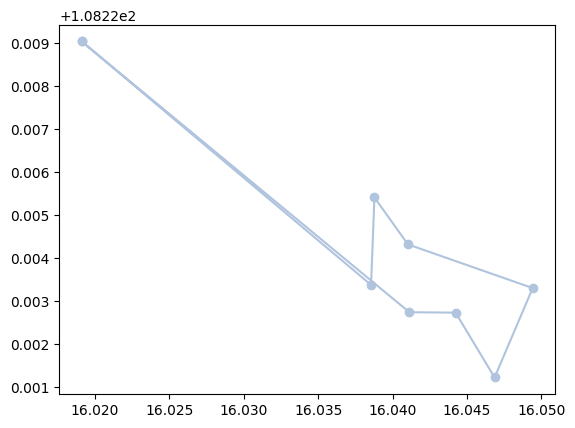

8653.205441075184


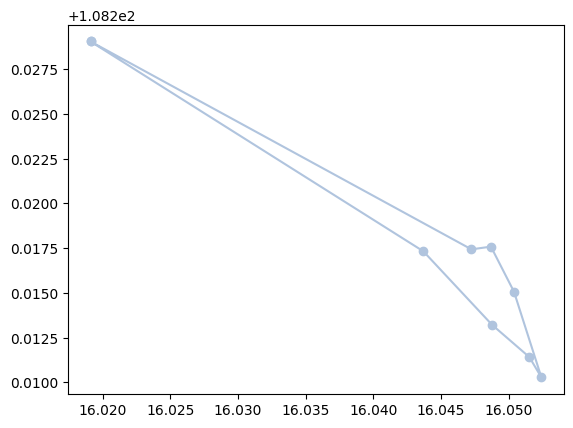

8740.190388970284


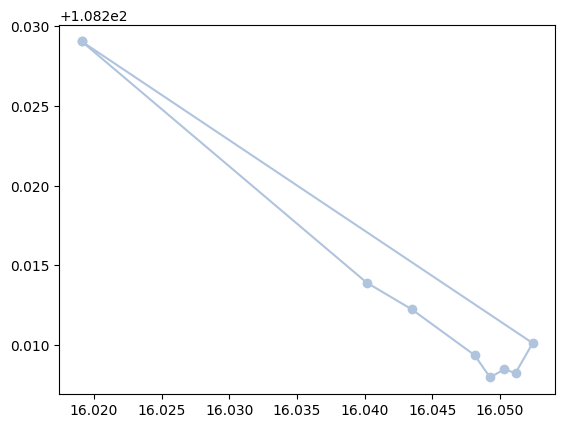

In [69]:
def check():
    initLocations = nearestNeighborAlgorithm(newData)
    for i in initLocations:
        bfr, brbg, bfbg, bdbg, params = geneticAlgorithm(500, 250, 50, 0.005, i)
        print(bfr.routeDistance())
        x, y = bfr.coordinates()
        plt.plot(x, y, **{'color': 'lightsteelblue', 'marker': 'o'})
        plt.show()
check()

In [ ]:
listInitialPoints = []
for i in range(50):
    listRandoms = newData.sample(14)
    listPoints = []
    for i , row in listRandoms.iterrows():    
        lat = row['Latitude']
        lng = row['Longitude']
        listPoints.append((lat, lng))
    listInitialPoints .append(listPoints)
listInitialPoints

In [21]:
listInitalLocations: List[List[Location]] = []
for listPoint in listInitialPoints:
    listInitalLocation = [Location(i[0], i[1]) for i in listPoint]
    listInitalLocations.append(listInitalLocation)

In [ ]:
listFitness = []
for i in listInitalLocations:
    bfr, brbg, bfbg, bdbg, params = geneticAlgorithm(3000, 500, 50, 0.005, i)
    listFitness.append(bfr.routeFitness())


In [ ]:
bestDistanceByMutation = []
i = 0.001
while(i <= 0.3):
    bfr, brbg, bfbg, bdbg, params = geneticAlgorithm(3000, 500, 50, i, listInitalLocations)
    bestDistanceByMutation.append(bfr.routeDistance())
    i += 0.001

In [23]:
{'mutationRate': 0.005,
 'numElites': 250,
 'numGens': 100,
 'populationSize': 500}

{'mutationRate': 0.005,
 'numElites': 250,
 'numGens': 100,
 'populationSize': 500}

7679.562591733709


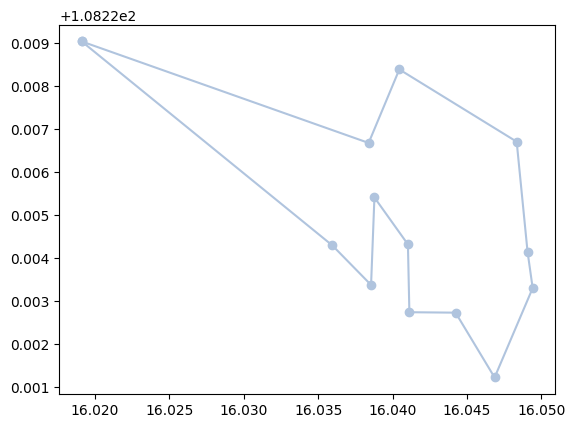

In [24]:
def test():
    listPoints, listDetailsPoint = nearestNeighborAlgorithm(newData, 13)
    listLocations = [Location(i[0], i[1]) for i in listPoints]
    bfr, brbg, bfbg, bdbg, params = geneticAlgorithm(500, 250, 100, 0.005, listLocations)
    print(bfr.routeDistance())
    x, y = bfr.coordinates()
    plt.plot(x, y, **{'color': 'lightsteelblue', 'marker': 'o'})
    plt.show()
test()

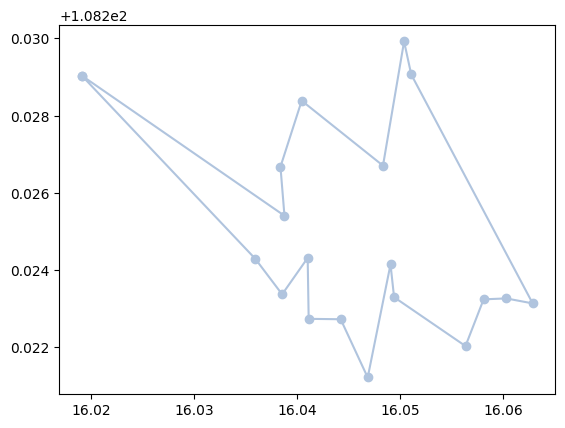

In [29]:
x, y = bfr.coordinates()
plt.plot(x, y, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.show()

In [283]:
def distancePlot(bestDistanceByGen: List[int], params: List):
    plt.plot(bestDistanceByGen)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    s = "popSize: " + str(params[0]) + "\nnumCities: " + str(params[1]) + \
        "\nnumGens: " + str(params[3]) + "\nmutationRate: " + str(params[4])
    # plt.text(s)
    # plt.text(0, bestDistanceByGen[0], round(bestDistanceByGen[0],1))
    plt.text(len(bestDistanceByGen),
             bestDistanceByGen[-1], round(bestDistanceByGen[-1],1))
    plt.show()

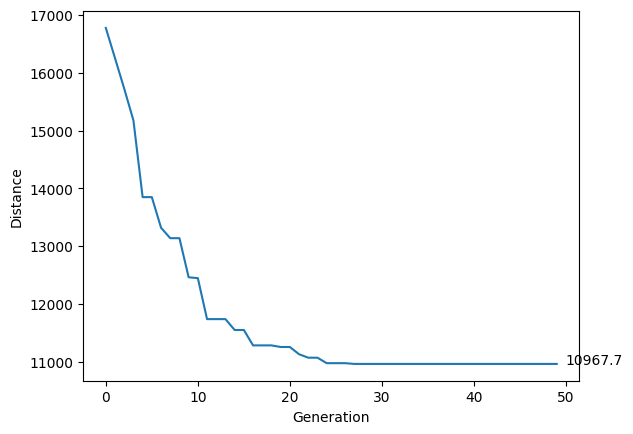

In [31]:
distancePlot(bdbg, params)

In [32]:
def fitnessePlot(bestDistanceByFitness: List[int], xAxis: List[int], params: List):
    plt.plot(xAxis, bestDistanceByFitness)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    s = "popSize: " + str(params[0]) + "\nnumCities: " + str(params[1]) + \
        "\nnumGens: " + str(params[3]) + "\nmutationRate: " + str(params[4])
    # plt.text(s)
    # plt.text(0, bestDistanceByFitness[0], round(bestDistanceByFitness[0],1))
    # plt.text(len(bestDistanceByFitness),
            #  bestDistanceByFitness[-1], round(bestDistanceByFitness[-1],1))
    plt.show()

In [ ]:
i = 0.001
xAxis = []
while(i <= 0.3):
    xAxis.append(i)
    i += 0.001
print(len(bestDistanceByMutation))
print(len(xAxis))
fitnessePlot(bestDistanceByMutation, xAxis, params)

100
100


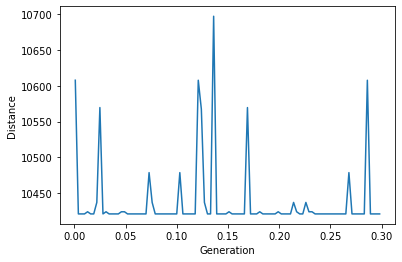

In [51]:
i = 0.001
xAxis = []
while(i <= 0.3):
    xAxis.append(i)
    i += 0.003
print(len(bestDistanceByMutation))
print(len(xAxis))
fitnessePlot(bestDistanceByMutation, xAxis, params)

100
100


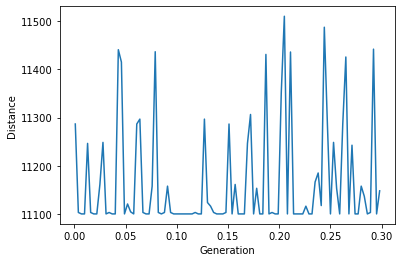

In [57]:
i = 0.001
xAxis = []
while(i <= 0.3):
    xAxis.append(i)
    i += 0.003
print(len(bestDistanceByMutation))
print(len(xAxis))
fitnessePlot(bestDistanceByMutation, xAxis, params)

In [92]:
trainingData = []
for i in range(500):
    listRandoms = newData.sample(22)
    listPoints = []
    for i , row in listRandoms.iterrows():    
        lat = row['Latitude']
        lng = row['Longitude']
        listPoints.append((lat, lng))
    trainingData.append(listPoints)
trainingData[0]

[(16.0954282, 108.2431088),
 (16.0359504, 108.2242925),
 (16.0633724, 108.2215429),
 (16.0667352, 108.2246568),
 (16.0401447, 108.2139202),
 (16.0503829, 108.2150664),
 (16.0481312, 108.2093638),
 (16.0666864, 108.2232191),
 (15.9900211, 108.1404581),
 (16.0673508, 108.2217765),
 (16.0436901, 108.2173205),
 (16.0388189, 108.2448648),
 (16.0660526, 108.2194068),
 (16.0605774, 108.2185875),
 (16.0603007, 108.2232677),
 (16.06291, 108.229815),
 (16.0607217, 108.2200138),
 (16.0672681, 108.2201214),
 (16.0597734, 108.2463747),
 (16.0588475, 108.2181053),
 (16.0629635, 108.218955),
 (16.066815, 108.216984)]

In [62]:
df1 = pd.DataFrame({'location': listInitalLocations, 'fitness': listFitness})
df

,numPops,numGens,numElites,muations,bestDistanceByMutation,fitness
0,1000,50,400,0.001,8360.936516,0.00012
1,1000,50,400,0.004,8360.936516,0.00012
2,1000,50,400,0.007,8360.936516,0.00012
3,1000,50,400,0.010,8360.936516,0.00012
4,1000,50,400,0.013,8363.922600,0.00012
...,...,...,...,...,...,...
2001,3000,100,500,0.286,8360.936516,0.00012
2002,3000,100,500,0.289,8360.936516,0.00012
2003,3000,100,500,0.292,8360.936516,0.00012
2004,3000,100,500,0.295,8360.936516,0.00012


In [62]:
def genetic(mutationRate, populationSize, numElites,numGens, listInitLocations):
    bfr, brbg, bfbg, bdbg, params =geneticAlgorithm(mutationRate=mutationRate, populationSize=populationSize, numElites=numElites,numGens=numGens, listInitLocations=listInitLocations)
    return bfr

In [60]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_is_fitted


class GeneticAlgorithmRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, mutationRate: float =0.0, populationSize: int =1, numElites: int=0, numGens: int=0): 
        self.mutationRate = mutationRate
        self.populationSize = populationSize
        self.numElites = numElites
        self.numGens = numGens
        self.ga = None
        self.best_fitness_ = None

    def fit(self, X, y): 
        route = genetic(mutationRate=self.mutationRate, populationSize=self.populationSize, numElites=self.numElites,numGens=self.numGens, listInitLocations=listInitalLocations[0])
        if self.best_fitness_ is None:
            self.best_fitness_ = route.routeFitness()
        if self.best_fitness_ < route.routeFitness():
            self.best_fitness_ = route.routeFitness()
        return self.best_fitness_

    def predict(self, X):
        check_is_fitted(self)
        return np.array(X.shape[0]*[self.best_fitness_])

In [61]:
print(genetic(mutationRate=0.001, populationSize=20, numElites=20,numGens=50, listInitLocations=X[0]))

NameError: name 'genetic' is not defined

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Load the TSP dataset

# Set up the genetic algorithm with a fixed crossover rate of 0.8
ga = GeneticAlgorithmRegressor()

# Define the parameter grid for mutation rate
param_grid = {
    'mutationRate': [0.001, 0.005,  0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3],
    'populationSize': [100, 200, 300, 400, 500],
    'numElites': [50, 100, 150, 250],
    'numGens': [ 50, 100],
}

# Set up the grid search
grid_search = GridSearchCV(ga, param_grid, cv=5)
X = listInitalLocations
y = listFitness

# Fit the grid search to the dataset
grid_search.fit(np.array(X),np.array(y))
grid_search.best_params_


NameError: name 'GeneticAlgorithmRegressor' is not defined